# Σύνδεση με το Google Drive
Αυτό το κελί χρησιμοποιείται για να γίνει η σύνδεση του Google Colab με το Google Drive. Με την εντολή `drive.mount` καθορίζεται το σημείο πρόσβασης στο Drive, επιτρέποντας την αποθήκευση και φόρτωση αρχείων απευθείας από το περιβάλλον του Colab.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Εισαγωγή Βιβλιοθηκών και Ορισμός Διαδρομών Αρχείων
Σε αυτό το κελί, εισάγονται οι βασικές βιβλιοθήκες που θα χρησιμοποιηθούν στο notebook, όπως οι `pandas`, `re`, `os`, `matplotlib.pyplot`, και `seaborn`. 

Επιπλέον:
- Ορίζεται η βασική διαδρομή όπου βρίσκονται τα δεδομένα στο Google Drive.
- Δημιουργείται ένα λεξικό με τις διαδρομές των αρχείων δεδομένων, το οποίο διευκολύνει τη διαχείριση και πρόσβαση σε αυτά.


In [2]:
## Κελί 1: Εισαγωγή Βιβλιοθηκών και Ορισμός Διαδρομών Αρχείων

import pandas as pd
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Ορισμός βασικής διαδρομής
base_path = '/content/drive/MyDrive/FakeNewsDetection/data'

# Αποθήκευση των διαδρομών σε λεξικό για ευκολότερη διαχείριση
data_paths = {
    'politifact_fake': os.path.join(base_path, 'politifact', 'politifact_fake.csv'),
    'politifact_real': os.path.join(base_path, 'politifact', 'politifact_real.csv'),
    'gossipcop_fake': os.path.join(base_path, 'gossipcop', 'gossipcop_fake.csv'),
    'gossipcop_real': os.path.join(base_path, 'gossipcop', 'gossipcop_real.csv')
}


## Φόρτωση Δεδομένων
Σε αυτό το κελί υλοποιείται η διαδικασία φόρτωσης των δεδομένων από τα αρχεία CSV:

- Ορίζεται η συνάρτηση `load_csv`, η οποία:
  - Διαβάζει το περιεχόμενο ενός αρχείου CSV χρησιμοποιώντας τη βιβλιοθήκη `pandas`.
  - Εμφανίζει μήνυμα επιτυχίας με το μέγεθος των δεδομένων ή μήνυμα λάθους εάν το αρχείο δεν βρεθεί ή προκύψει άλλο σφάλμα.
- Χρησιμοποιώντας τη συνάρτηση `load_csv`, φορτώνονται τα δεδομένα από το λεξικό `data_paths` για τα αρχεία `politifact_fake`, `politifact_real`, `gossipcop_fake`, και `gossipcop_real`.
- Δημιουργούνται αντίγραφα των αρχικών δεδομένων για μελλοντική επεξεργασία χωρίς να επηρεάζονται τα πρωτότυπα.

Επιβεβαιώνεται στο τέλος ότι τα αντίγραφα έχουν δημιουργηθεί επιτυχώς.


In [3]:
## Κελί 2: Φόρτωση Δεδομένων

# Φόρτωση δεδομένων
def load_csv(path):
    try:
        data = pd.read_csv(path)
        print(f"Loaded {path} successfully. Shape: {data.shape}")
        return data
    except FileNotFoundError:
        print(f"File not found: {path}")
        return None
    except Exception as e:
        print(f"Error loading {path}: {e}")
        return None

# Φόρτωση όλων των δεδομένων από το λεξικό data_paths
politifact_fake_original = load_csv(data_paths['politifact_fake'])
politifact_real_original = load_csv(data_paths['politifact_real'])
gossipcop_fake_original = load_csv(data_paths['gossipcop_fake'])
gossipcop_real_original = load_csv(data_paths['gossipcop_real'])

# Δημιουργία Αντιγράφων Δεδομένων
politifact_fake = politifact_fake_original.copy() if politifact_fake_original is not None else None
politifact_real = politifact_real_original.copy() if politifact_real_original is not None else None
gossipcop_fake = gossipcop_fake_original.copy() if gossipcop_fake_original is not None else None
gossipcop_real = gossipcop_real_original.copy() if gossipcop_real_original is not None else None

print("Δημιουργήθηκαν αντίγραφα των αρχικών δεδομένων.")


Loaded /content/drive/MyDrive/FakeNewsDetection/data/politifact/politifact_fake.csv successfully. Shape: (432, 4)
Loaded /content/drive/MyDrive/FakeNewsDetection/data/politifact/politifact_real.csv successfully. Shape: (624, 4)
Loaded /content/drive/MyDrive/FakeNewsDetection/data/gossipcop/gossipcop_fake.csv successfully. Shape: (5323, 4)
Loaded /content/drive/MyDrive/FakeNewsDetection/data/gossipcop/gossipcop_real.csv successfully. Shape: (16817, 4)
Δημιουργήθηκαν αντίγραφα των αρχικών δεδομένων.


## Καθαρισμός και Επεξεργασία Δεδομένων
Σε αυτό το κελί πραγματοποιείται ο καθαρισμός και η επεξεργασία των δεδομένων:

- **Έλεγχος απαιτούμενων στηλών**:
  - Η συνάρτηση `validate_columns` ελέγχει αν τα δεδομένα περιέχουν συγκεκριμένες στήλες που απαιτούνται για την ανάλυση.
  - Εμφανίζει μήνυμα για στήλες που λείπουν, αν υπάρχουν.

- **Καθαρισμός κειμένου**:
  - Η συνάρτηση `clean_text` καθαρίζει το κείμενο:
    - Αφαιρεί επιπλέον κενά.
    - Αφαιρεί μη-αλφαριθμητικά σύμβολα.
    - Επιστρέφει το καθαρισμένο κείμενο.

- **Επεξεργασία δεδομένων**:
  - Μετονομάζεται η στήλη `news_url` σε `url`, αν υπάρχει, ώστε να είναι συμβατή με τις απαιτήσεις.
  - Προστίθεται στήλη `label` για την κατηγοριοποίηση των δεδομένων (0 για ψευδείς ειδήσεις, 1 για αληθείς ειδήσεις).
  - Εφαρμόζεται η διαδικασία καθαρισμού στην στήλη `title` για κάθε dataset.

Με την ολοκλήρωση του κελιού, τα δεδομένα έχουν καθαριστεί και προετοιμαστεί κατάλληλα για επεξεργασία και ανάλυση.


In [4]:
## Κελί 3: Καθαρισμός και Επεξεργασία Δεδομένων

import re

# Έλεγχος απαιτούμενων στηλών
def validate_columns(data, required_columns):
    if data is None:
        print("Data is None, cannot validate columns.")
        return False
    missing_columns = [col for col in required_columns if col not in data.columns]
    if missing_columns:
        print(f"Missing columns: {missing_columns}")
        return False
    return True

# Καθαρισμός κειμένου
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Αφαίρεση επιπλέον κενών
    text = re.sub(r'[^\w\s]', '', text)  # Αφαίρεση μη-αλφαριθμητικών συμβόλων
    return text.strip()

# Απαιτούμενες στήλες
required_columns = ['title', 'url']  # Χρήση 'url' αντί για 'news_url'

datasets = [
    (politifact_fake, 0),
    (politifact_real, 1),
    (gossipcop_fake, 0),
    (gossipcop_real, 1)
]

for df, label_value in datasets:
    # Μετονομασία της στήλης 'news_url' σε 'url' πριν τον έλεγχο
    if 'news_url' in df.columns:
        df.rename(columns={'news_url': 'url'}, inplace=True)

    if validate_columns(df, required_columns):
        df['label'] = label_value
        df['title'] = df['title'].apply(clean_text)

print("Καθαρισμός και επεξεργασία δεδομένων ολοκληρώθηκε.")


Καθαρισμός και επεξεργασία δεδομένων ολοκληρώθηκε.


## Εξαγωγή Χαρακτηριστικών από URL
Σε αυτό το κελί πραγματοποιείται η εξαγωγή χαρακτηριστικών από τη στήλη `url` των δεδομένων:

- **Συνάρτηση `extract_url_features`**:
  - Εξάγει τα παρακάτω χαρακτηριστικά για κάθε URL:
    1. Το μήκος του URL (`url_length`).
    2. Αν το URL περιέχει τη λέξη "fake" (`contains_fake_word`).
    3. Το domain του URL (`domain`), χρησιμοποιώντας τη βιβλιοθήκη `urllib.parse` για ασφαλή ανάλυση του URL.
  - Αν το URL είναι κενό ή μη διαθέσιμο, επιστρέφει προεπιλεγμένες τιμές.

- **Συγχώνευση δεδομένων**:
  - Συνδυάζονται τα datasets (`politifact_fake`, `politifact_real`, `gossipcop_fake`, `gossipcop_real`) σε ένα ενιαίο DataFrame για περαιτέρω επεξεργασία.

- **Εφαρμογή εξαγωγής χαρακτηριστικών**:
  - Η συνάρτηση `extract_url_features` εφαρμόζεται στη στήλη `url`, και τα εξαγόμενα χαρακτηριστικά (`url_length`, `contains_fake_word`, `domain`) προστίθενται ως νέες στήλες στο DataFrame.

Με την ολοκλήρωση αυτού του κελιού, τα δεδομένα περιέχουν επιπλέον χαρακτηριστικά βασισμένα στις διευθύνσεις URL, τα οποία μπορούν να αξιοποιηθούν σε μεταγενέστερη ανάλυση ή μοντελοποίηση.


In [ ]:
## Κελί 4: Εξαγωγή Χαρακτηριστικών από URL

from urllib.parse import urlparse

# Εξαγωγή χαρακτηριστικών από το URL
def extract_url_features(url):
    if pd.isna(url):
        return pd.Series([0, 0, "unknown"])
    url_length = len(url)
    contains_fake_word = 1 if "fake" in url.lower() else 0

    # Χρήση urlparse για ασφαλέστερη εξαγωγή του domain
    parsed_url = urlparse(url)
    domain = parsed_url.netloc if parsed_url.netloc else "unknown"

    return pd.Series([url_length, contains_fake_word, domain])

# Συγχώνευση δεδομένων (έχουμε ήδη καθαρίσει τα datasets)
data = pd.concat([politifact_fake, politifact_real, gossipcop_fake, gossipcop_real], ignore_index=True)

# Μετονομασία της στήλης 'news_url' σε 'url'
data.rename(columns={'news_url': 'url'}, inplace=True)

# Εφαρμογή της extract_url_features στη στήλη url
data[['url_length', 'contains_fake_word', 'domain']] = data['url'].apply(extract_url_features)

print("Εξαγωγή χαρακτηριστικών από το URL ολοκληρώθηκε.")


Εξαγωγή χαρακτηριστικών από το URL ολοκληρώθηκε.


## Προετοιμασία και Αποθήκευση Δεδομένων
Σε αυτό το κελί ολοκληρώνεται η προετοιμασία των δεδομένων για χρήση και αποθηκεύονται σε αρχείο:

- **Έλεγχος Στήλης `label`**:
  - Εξασφαλίζεται ότι η στήλη `label` υπάρχει στα δεδομένα. Αν όχι, προκαλείται σφάλμα για να διορθωθεί πριν από αυτό το βήμα.

- **Περιορισμός στις Χρήσιμες Στήλες**:
  - Τα δεδομένα περιορίζονται στις απαραίτητες στήλες: `title`, `url_length`, `contains_fake_word`, και `label`.

- **Διαχείριση Κενών Δεδομένων**:
  - Εντοπίζονται και αφαιρούνται εγγραφές με κενές τιμές για να διασφαλιστεί η καθαρότητα των δεδομένων.

- **Μετατροπή Ετικετών σε Αριθμητική Μορφή**:
  - Η στήλη `label` μετατρέπεται σε ακέραια τιμή για χρήση σε μοντέλα μηχανικής μάθησης.

- **Ανακάτεμα (Shuffle) Δεδομένων**:
  - Τα δεδομένα ανακατεύονται τυχαία (με σταθερό seed για αναπαραγωγιμότητα).

- **Έλεγχος Κατανομής και Στατιστικά**:
  - Παρουσιάζεται η κατανομή των ετικετών (`label`) και βασικά στατιστικά για τη στήλη `url_length`.

- **Αποθήκευση Ενημερωμένων Δεδομένων**:
  - Τα δεδομένα αποθηκεύονται σε αρχείο CSV, με όνομα που περιλαμβάνει timestamp για μοναδικότητα.
  - Δημιουργείται φάκελος αποθήκευσης αν δεν υπάρχει ήδη.

- **Τελικό Μέγεθος**:
  - Εκτυπώνεται το μέγεθος του τελικού σετ δεδομένων.

Με την ολοκλήρωση αυτού του κελιού, τα δεδομένα είναι πλήρως προετοιμασμένα και αποθηκευμένα, έτοιμα για χρήση σε αναλύσεις ή μοντέλα μηχανικής μάθησης.


In [6]:
## Κελί 5: Προετοιμασία και Αποθήκευση Δεδομένων

from sklearn.utils import shuffle
from datetime import datetime
import os

# Έλεγχος αν η στήλη 'label' υπάρχει
if 'label' not in data.columns:
    raise ValueError("Η στήλη 'label' δεν υπάρχει στο DataFrame. Βεβαιώσου ότι έχει δημιουργηθεί πριν από αυτό το βήμα.")

# Περιορισμός στις χρήσιμες στήλες
data = data[['title', 'url_length', 'contains_fake_word', 'label']]

# Έλεγχος για κενά δεδομένα
print("\nΈλεγχος για κενά δεδομένα:")
print(data.isnull().sum())
data.dropna(inplace=True)

# Βεβαιώσου ότι τα labels είναι αριθμητικά
data['label'] = data['label'].astype(int)

# Shuffle των δεδομένων
data = shuffle(data, random_state=42)

# Έλεγχος συμμετρίας κατηγοριών
print("\nΚατανομή ετικετών (Labels):")
label_counts = data['label'].value_counts()
print(label_counts)

# Επιπλέον στατιστικά
print("\nΒασικά στατιστικά url_length:")
print(data['url_length'].describe())

# Αποθήκευση ενημερωμένων δεδομένων με timestamp
output_filename = f"updated_merged_data_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
output_dir = '/content/drive/MyDrive/FakeNewsDetection/data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

output_path = os.path.join(output_dir, output_filename)
data.to_csv(output_path, index=False)
print(f"Τα ενημερωμένα δεδομένα αποθηκεύτηκαν στο {output_path}.")

# Μέγεθος τελικού σετ
print(f"Τελικό μέγεθος δεδομένων: {data.shape}")



Έλεγχος για κενά δεδομένα:
title                 0
url_length            0
contains_fake_word    0
label                 0
dtype: int64

Κατανομή ετικετών (Labels):
label
1    17441
0     5755
Name: count, dtype: int64

Βασικά στατιστικά url_length:
count    23196.000000
mean        93.076565
std         30.274808
min          0.000000
25%         75.000000
50%         94.000000
75%        112.000000
max        331.000000
Name: url_length, dtype: float64
Τα ενημερωμένα δεδομένα αποθηκεύτηκαν στο /content/drive/MyDrive/FakeNewsDetection/data/updated_merged_data_20241208_110450.csv.
Τελικό μέγεθος δεδομένων: (23196, 4)


<ipython-input-6-35d6b3a0cb84>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
<ipython-input-6-35d6b3a0cb84>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['label'].astype(int)


## Οπτικοποίηση
Σε αυτό το κελί δημιουργείται μια γραφική απεικόνιση της κατανομής των ετικετών (labels) στα δεδομένα:

- **Χρήση `seaborn` για την Οπτικοποίηση**:
  - Ορίζεται θέμα `whitegrid` για καθαρή εμφάνιση.
  - Δημιουργείται διάγραμμα κατανομής χρησιμοποιώντας τη συνάρτηση `countplot` της βιβλιοθήκης `seaborn`.
  - Τα δεδομένα ταξινομούνται με βάση τις ετικέτες `label` (0 για Fake και 1 για Real).

- **Προσαρμογές Διαγράμματος**:
  - Τίτλος: `Κατανομή Labels (Fake vs Real)`.
  - Ετικέτες αξόνων: `Labels (0: Fake, 1: Real)` για τον άξονα x και `Αριθμός Δεδομένων` για τον άξονα y.
  - Αντικατάσταση ετικετών άξονα x με τα ονόματα "Fake" και "Real".

- **Προσθήκη Τιμών Πάνω από τις Μπάρες**:
  - Για κάθε μπάρα του διαγράμματος, προστίθεται ο αντίστοιχος αριθμός δεδομένων ως annotation.

Με την ολοκλήρωση αυτού του κελιού, παρέχεται μια σαφής εικόνα της κατανομής μεταξύ ψευδών και πραγματικών ειδήσεων στα δεδομένα.


<ipython-input-7-614843667b14>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label', data=data, palette="viridis", order=[0, 1])
<ipython-input-7-614843667b14>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Fake", "Real"])


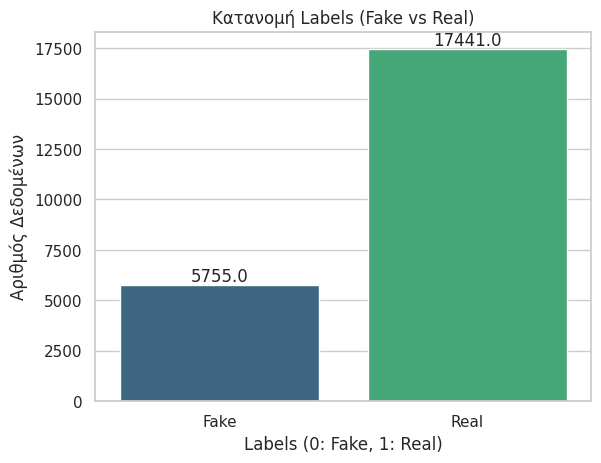

In [7]:
## Κελί 6: Οπτικοποίηση

sns.set_theme(style="whitegrid")

# Οπτικοποίηση κατανομής κατηγοριών
ax = sns.countplot(x='label', data=data, palette="viridis", order=[0, 1])
ax.set_title('Κατανομή Labels (Fake vs Real)')
ax.set_xlabel('Labels (0: Fake, 1: Real)')
ax.set_ylabel('Αριθμός Δεδομένων')
ax.set_xticklabels(["Fake", "Real"])

# Προσθήκη τιμών πάνω από τις μπάρες
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom')

plt.show()


## Διαχωρισμός Δεδομένων για Εκπαίδευση και Δοκιμή
Σε αυτό το κελί πραγματοποιείται ο διαχωρισμός των δεδομένων σε σύνολα εκπαίδευσης και δοκιμής:

- **Χρήση της `train_test_split`**:
  - Διαχωρίζονται τα χαρακτηριστικά (`title`, `url_length`, `contains_fake_word`) και οι ετικέτες (`label`) σε δύο σύνολα:
    - `X_train` και `y_train`: Χαρακτηριστικά και ετικέτες για εκπαίδευση.
    - `X_test` και `y_test`: Χαρακτηριστικά και ετικέτες για δοκιμή.

- **Παράμετροι Διαχωρισμού**:
  - `test_size=0.2`: Το 20% των δεδομένων χρησιμοποιείται για δοκιμή.
  - `random_state=42`: Ορίζεται σταθερός seed για αναπαραγωγιμότητα των αποτελεσμάτων.
  - `stratify=data['label']`: Ο διαχωρισμός γίνεται με διατήρηση της ίδιας κατανομής των κατηγοριών (`label`) μεταξύ των δύο συνόλων.

Με την ολοκλήρωση αυτού του κελιού, τα δεδομένα έχουν διαχωριστεί με τέτοιο τρόπο ώστε να εξασφαλίζεται ισορροπημένη εκπροσώπηση των κατηγοριών και αναπαραγωγιμότητα στα αποτελέσματα.


In [ ]:
## Κελί 7: Train/Test Split

from sklearn.model_selection import train_test_split

# Διαχωρισμός δεδομένων
X_train, X_test, y_train, y_test = train_test_split(
    data[['title', 'url_length', 'contains_fake_word']],
    data['label'],
    test_size=0.2,
    random_state=42,
    stratify=data['label']
)


## TF-IDF Vectorizer και Συνδυασμός Χαρακτηριστικών
Σε αυτό το κελί εφαρμόζονται τεχνικές επεξεργασίας κειμένου και αριθμητικών χαρακτηριστικών, ενώ πραγματοποιείται ο συνδυασμός τους:

- **TF-IDF Vectorizer**:
  - Δημιουργείται και εκπαιδεύεται ένας `TfidfVectorizer` για τους τίτλους (`title`) των δεδομένων.
  - Ο Vectorizer χρησιμοποιεί bigrams (`ngram_range=(1,2)`) και αγνοεί κοινές αγγλικές λέξεις (`stop_words='english'`).
  - Μετατρέπει τους τίτλους του `X_train` και `X_test` σε sparse matrices με βάση το TF-IDF.

- **Κλιμάκωση Αριθμητικών Χαρακτηριστικών**:
  - Εφαρμόζεται `StandardScaler` για την κλιμάκωση των αριθμητικών χαρακτηριστικών (`url_length` και `contains_fake_word`).
  - Τα κλιμακωμένα δεδομένα μετατρέπονται σε sparse μορφή για συμβατότητα με τα TF-IDF δεδομένα.

- **Συνδυασμός Χαρακτηριστικών**:
  - Συνδυάζονται τα TF-IDF χαρακτηριστικά με τα κλιμακωμένα αριθμητικά χαρακτηριστικά:
    - `X_train_combined`: Συνδυασμένο training set.
    - `X_test_combined`: Συνδυασμένο test set.

- **Αποθήκευση Μοντέλων**:
  - Ο TF-IDF Vectorizer και ο Scaler αποθηκεύονται ως αρχεία `.pkl` στον φάκελο `/content/drive/MyDrive/FakeNewsDetection/models`.

- **Εκτύπωση Διαστάσεων**:
  - Εμφανίζονται οι διαστάσεις των συνδυασμένων χαρακτηριστικών για το training και test set.

Με την ολοκλήρωση αυτού του κελιού, τα δεδομένα είναι έτοιμα για χρήση σε αλγορίθμους μηχανικής μάθησης, με συνδυασμένα χαρακτηριστικά τόσο από κείμενο όσο και από αριθμητικές τιμές.


In [ ]:
## Κελί 8: TF-IDF Vectorizer and Feature Combination

from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack, csr_matrix
import joblib
import os

# Δημιουργία και Εκπαίδευση του TF-IDF Vectorizer με bigrams
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2))
tfidf_vectorizer.fit(X_train['title'])  # Εκπαίδευση στους τίτλους

# Μετατροπή τίτλων σε TF-IDF μορφή
X_train_tfidf = tfidf_vectorizer.transform(X_train['title'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['title'])

# Κλιμάκωση των αριθμητικών χαρακτηριστικών
scaler = StandardScaler()
numeric_train_scaled = scaler.fit_transform(X_train[['url_length', 'contains_fake_word']])
numeric_test_scaled = scaler.transform(X_test[['url_length', 'contains_fake_word']])

# Μετατροπή των numeric features σε sparse για συνέπεια
numeric_train_sparse = csr_matrix(numeric_train_scaled)
numeric_test_sparse = csr_matrix(numeric_test_scaled)

# Συνδυασμός TF-IDF και κλιμακωμένων numeric features
X_train_combined = hstack([X_train_tfidf, numeric_train_sparse])
X_test_combined = hstack([X_test_tfidf, numeric_test_sparse])

# Εκτύπωση διαστάσεων
print(f"Training Set Combined Shape: {X_train_combined.shape}")
print(f"Test Set Combined Shape: {X_test_combined.shape}")

# Αποθήκευση του TF-IDF Vectorizer και του Scaler
models_dir = '/content/drive/MyDrive/FakeNewsDetection/models'
os.makedirs(models_dir, exist_ok=True)

vectorizer_path = os.path.join(models_dir, 'tfidf_vectorizer.pkl')
scaler_path = os.path.join(models_dir, 'scaler.pkl')

joblib.dump(tfidf_vectorizer, vectorizer_path)
joblib.dump(scaler, scaler_path)

print(f"Ο TF-IDF Vectorizer αποθηκεύτηκε στο {vectorizer_path}.")
print(f"Ο Scaler αποθηκεύτηκε στο {scaler_path}.")


Training Set Combined Shape: (18556, 5002)
Test Set Combined Shape: (4640, 5002)
Ο TF-IDF Vectorizer αποθηκεύτηκε στο /content/drive/MyDrive/FakeNewsDetection/models/tfidf_vectorizer.pkl.
Ο Scaler αποθηκεύτηκε στο /content/drive/MyDrive/FakeNewsDetection/models/scaler.pkl.


## Αξιολόγηση Μοντέλου με Stratified K-Fold Cross-Validation
Σε αυτό το κελί πραγματοποιείται η αξιολόγηση του μοντέλου χρησιμοποιώντας Stratified K-Fold Cross-Validation:

- **Διαδικασία Stratified K-Fold**:
  - Χωρίζει το training set σε 5 folds, διατηρώντας την κατανομή των κατηγοριών `label` σε κάθε fold.
  - Επαναλαμβάνει την εκπαίδευση και αξιολόγηση για κάθε fold.

- **Διαδικασία για Κάθε Fold**:
  1. Διαχωρίζονται τα δεδομένα σε training και validation set για το συγκεκριμένο fold.
  2. Δημιουργείται και εκπαιδεύεται ένας νέος TF-IDF Vectorizer μόνο στο training set του fold.
  3. Μετατρέπονται οι τίτλοι (`title`) σε TF-IDF μορφή για τα training και validation δεδομένα.
  4. Εφαρμόζεται κλιμάκωση στα αριθμητικά χαρακτηριστικά (`url_length` και `contains_fake_word`) και μετατρέπονται σε sparse μορφή.
  5. Συνδυάζονται τα TF-IDF και τα numeric features.
  6. Εκπαιδεύεται ένα μοντέλο SVM (Support Vector Machine) με γραμμικό πυρήνα (`kernel='linear'`).
  7. Γίνονται προβλέψεις στο validation set και υπολογίζεται το F1-Score για το fold.

- **Αποτελέσματα**:
  - Για κάθε fold, εκτυπώνεται το F1-Score και η αναφορά ταξινόμησης (classification report).
  - Υπολογίζονται οι τελικές μετρικές:
    - Μέσος F1-Score.
    - Τυπική απόκλιση του F1-Score.

Με την ολοκλήρωση αυτού του κελιού, παρέχεται μια συνολική εικόνα της απόδοσης του SVM μοντέλου σε πολλαπλά splits των δεδομένων, εξασφαλίζοντας αξιοπιστία στα αποτελέσματα.


In [10]:
## Κελί 9: Αξιολόγηση Μοντέλου με Stratified K-Fold Cross-Validation

from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack, csr_matrix
import numpy as np

# Δημιουργία Stratified K-Fold Cross Validator
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

f1_scores = []

for i, (train_idx, val_idx) in enumerate(stratified_kfold.split(X_train, y_train)):
    # Διαχωρισμός Training και Validation Fold
    X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Δημιουργία και εκπαίδευση νέου TF-IDF Vectorizer ΜΟΝΟ στο training fold
    fold_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2))
    fold_vectorizer.fit(X_fold_train['title'])

    X_fold_train_tfidf = fold_vectorizer.transform(X_fold_train['title'])
    X_fold_val_tfidf = fold_vectorizer.transform(X_fold_val['title'])

    # Scaling των numeric features
    scaler = StandardScaler()
    numeric_fold_train = scaler.fit_transform(X_fold_train[['url_length', 'contains_fake_word']])
    numeric_fold_val = scaler.transform(X_fold_val[['url_length', 'contains_fake_word']])

    # Μετατροπή σε sparse
    numeric_fold_train_sparse = csr_matrix(numeric_fold_train)
    numeric_fold_val_sparse = csr_matrix(numeric_fold_val)

    # Συνδυασμός TF-IDF και numeric features
    X_fold_train_combined = hstack([X_fold_train_tfidf, numeric_fold_train_sparse])
    X_fold_val_combined = hstack([X_fold_val_tfidf, numeric_fold_val_sparse])

    # Δημιουργία και Εκπαίδευση SVM
    svm_model = SVC(kernel='linear', random_state=42)
    svm_model.fit(X_fold_train_combined, y_fold_train)

    # Πρόβλεψη στο Validation Fold
    y_fold_pred = svm_model.predict(X_fold_val_combined)

    # Υπολογισμός F1-Score
    fold_f1_score = f1_score(y_fold_val, y_fold_pred, average='weighted')
    f1_scores.append(fold_f1_score)

    # Αναφορά για κάθε fold
    print(f"\nFold {i + 1} F1-Score: {fold_f1_score:.4f}")
    print(classification_report(y_fold_val, y_fold_pred))

# Υπολογισμός και Εκτύπωση Τελικών Αποτελεσμάτων
f1_scores = np.array(f1_scores)
print(f"\nF1-Score για κάθε fold: {f1_scores}")
print(f"Μέσος F1-Score: {f1_scores.mean():.4f}")
print(f"Τυπική Απόκλιση F1-Score: {f1_scores.std():.4f}")



Fold 1 F1-Score: 0.8341
              precision    recall  f1-score   support

           0       0.78      0.53      0.63       921
           1       0.86      0.95      0.90      2791

    accuracy                           0.85      3712
   macro avg       0.82      0.74      0.77      3712
weighted avg       0.84      0.85      0.83      3712


Fold 2 F1-Score: 0.8305
              precision    recall  f1-score   support

           0       0.75      0.53      0.62       921
           1       0.86      0.94      0.90      2790

    accuracy                           0.84      3711
   macro avg       0.81      0.74      0.76      3711
weighted avg       0.83      0.84      0.83      3711


Fold 3 F1-Score: 0.8337
              precision    recall  f1-score   support

           0       0.77      0.53      0.63       921
           1       0.86      0.95      0.90      2790

    accuracy                           0.84      3711
   macro avg       0.81      0.74      0.77      3711

## Τελική Εκπαίδευση και Αποθήκευση του TF-IDF Vectorizer και Scaler
Σε αυτό το κελί πραγματοποιείται η τελική εκπαίδευση του `TfidfVectorizer` και του `StandardScaler` χρησιμοποιώντας το πλήρες training set, ενώ τα μοντέλα αποθηκεύονται για μελλοντική χρήση.

### Διαδικασία
1. **Επαναεκπαίδευση TF-IDF Vectorizer**:
   - Δημιουργείται ένας `TfidfVectorizer` με bigrams (`ngram_range=(1,2)`) και όριο 5000 χαρακτηριστικών.
   - Εκπαιδεύεται στο σύνολο τίτλων (`title`) του training set.

2. **Κλιμάκωση Numeric Χαρακτηριστικών**:
   - Εφαρμόζεται `StandardScaler` για τα αριθμητικά χαρακτηριστικά (`url_length`, `contains_fake_word`).
   - Τα δεδομένα μετατρέπονται σε sparse μορφή για συμβατότητα με τα TF-IDF δεδομένα.

3. **Συνδυασμός Χαρακτηριστικών**:
   - Τα TF-IDF χαρακτηριστικά συνδυάζονται με τα κλιμακωμένα αριθμητικά χαρακτηριστικά.

4. **Αποθήκευση Μοντέλων**:
   - Ο τελικός `TF-IDF Vectorizer` και ο `Scaler` αποθηκεύονται ως αρχεία `.pkl` στον φάκελο `/content/drive/MyDrive/FakeNewsDetection/models`.

5. **Δοκιμή Φόρτωσης και Εφαρμογής**:
   - Φορτώνονται τα αποθηκευμένα μοντέλα.
   - Γίνεται δοκιμή σε έναν τίτλο:
     - Μετατρέπεται σε TF-IDF.
     - Υπολογίζονται τα numeric χαρακτηριστικά (μήκος και παρουσία λέξης "fake").
     - Συνδυάζονται τα TF-IDF και numeric χαρακτηριστικά.

### Αποτελέσματα
- Εμφανίζονται οι διαστάσεις:
  - Των TF-IDF δεδομένων.
  - Του συνδυασμένου training set.
  - Της συνδυασμένης αναπαράστασης για τον δοκιμαστικό τίτλο.

Με την ολοκλήρωση αυτού του κελιού, τα τελικά εργαλεία επεξεργασίας δεδομένων είναι εκπαιδευμένα, αποθηκευμένα και έτοιμα για χρήση σε νέα δεδομένα ή σε ανάπτυξη μοντέλου.


In [11]:
## Κελί 10: Τελική Εκπαίδευση και Αποθήκευση του TF-IDF Vectorizer και Scaler

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack, csr_matrix
from sklearn.preprocessing import StandardScaler
import joblib
import os

# Επαναεκπαίδευση του TF-IDF Vectorizer σε όλο το training set
final_tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2))
final_tfidf_vectorizer.fit(X_train['title'])  # Εκπαίδευση στους τίτλους του training set

# Μετατροπή τίτλων σε TF-IDF μορφή
X_train_tfidf = final_tfidf_vectorizer.transform(X_train['title'])

# Κλιμάκωση των numeric features
scaler = StandardScaler()
numeric_train_scaled = scaler.fit_transform(X_train[['url_length', 'contains_fake_word']])
numeric_train_sparse = csr_matrix(numeric_train_scaled)

# Συνδυασμός TF-IDF και Numeric Χαρακτηριστικών
X_train_combined = hstack([X_train_tfidf, numeric_train_sparse])

# Έλεγχος διαστάσεων
print(f"TF-IDF Training Shape: {X_train_tfidf.shape}")
print(f"Combined Training Shape: {X_train_combined.shape}")

# Αποθήκευση του τελικού TF-IDF Vectorizer και Scaler
models_dir = '/content/drive/MyDrive/FakeNewsDetection/models'
os.makedirs(models_dir, exist_ok=True)

final_vectorizer_path = os.path.join(models_dir, 'final_tfidf_vectorizer.pkl')
scaler_path = os.path.join(models_dir, 'final_scaler.pkl')

joblib.dump(final_tfidf_vectorizer, final_vectorizer_path)
joblib.dump(scaler, scaler_path)

print(f"Ο τελικός TF-IDF Vectorizer αποθηκεύτηκε στο {final_vectorizer_path}.")
print(f"Ο Scaler αποθηκεύτηκε στο {scaler_path}.")

# Δοκιμή Φόρτωσης και Εφαρμογής
loaded_vectorizer = joblib.load(final_vectorizer_path)
loaded_scaler = joblib.load(scaler_path)

test_title = ["Breaking news: example headline"]
test_tfidf = loaded_vectorizer.transform(test_title)
test_numeric = [[len(test_title[0]), 1 if "fake" in test_title[0].lower() else 0]]
test_numeric_scaled = loaded_scaler.transform(test_numeric)
test_numeric_sparse = csr_matrix(test_numeric_scaled)
test_combined = hstack([test_tfidf, test_numeric_sparse])

print(f"TF-IDF Shape for Test Title: {test_tfidf.shape}")
print(f"Combined Shape for Test Title: {test_combined.shape}")


TF-IDF Training Shape: (18556, 5000)
Combined Training Shape: (18556, 5002)
Ο τελικός TF-IDF Vectorizer αποθηκεύτηκε στο /content/drive/MyDrive/FakeNewsDetection/models/final_tfidf_vectorizer.pkl.
Ο Scaler αποθηκεύτηκε στο /content/drive/MyDrive/FakeNewsDetection/models/final_scaler.pkl.
TF-IDF Shape for Test Title: (1, 5000)
Combined Shape for Test Title: (1, 5002)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Εκπαίδευση του SVM με Grid Search (Pipeline & ColumnTransformer)
Αυτό το κελί εκπαιδεύει ένα μοντέλο SVM (Support Vector Machine) με χρήση `GridSearchCV`, εφαρμόζοντας ταυτόχρονα προεπεξεργασία δεδομένων μέσω `Pipeline` και `ColumnTransformer`.

### Διαδικασία
1. **Προεπεξεργασία με `ColumnTransformer`**:
   - Χαρακτηριστικά κειμένου (`title`):
     - Εφαρμόζεται `TfidfVectorizer` με bigrams και έως 5000 χαρακτηριστικά.
   - Αριθμητικά χαρακτηριστικά (`url_length`, `contains_fake_word`):
     - Κλιμακώνονται με `StandardScaler` και μετατρέπονται σε sparse μορφή.

2. **Pipeline**:
   - Περιλαμβάνει:
     - Προεπεξεργασία χαρακτηριστικών (ColumnTransformer).
     - Εκπαίδευση του μοντέλου SVM.

3. **Grid Search**:
   - Δοκιμάζει διαφορετικές παραμέτρους του SVM:
     - `C`: Ρύθμιση regularization (0.1, 1, 10, 100).
     - `kernel`: Επιλογή γραμμικού (`linear`) ή μη γραμμικού πυρήνα (`rbf`).
     - `class_weight`: Αυτόματη ισορροπία κατηγοριών (`balanced`).
   - Αξιολογεί τα αποτελέσματα χρησιμοποιώντας 5-fold Stratified Cross-Validation με βάση το `f1_weighted`.

4. **Εκπαίδευση και Βέλτιστες Παράμετροι**:
   - Εκπαιδεύεται το SVM και εξάγονται οι βέλτιστες παράμετροι.
   - Αποθηκεύονται τα αποτελέσματα του Grid Search σε αρχείο CSV.

5. **Αξιολόγηση στο Test Set**:
   - Πρόβλεψη των ετικετών (`y_pred_best`) και πιθανοτήτων (`y_pred_proba`) στο Test Set.
   - Υπολογισμός και εκτύπωση μετρικών:
     - `F1-Score` (weighted).
     - `ROC-AUC`.
     - `Confusion Matrix`.

6. **Αποθήκευση**:
   - Classification report αποθηκεύεται σε αρχείο JSON.
   - Το εκπαιδευμένο μοντέλο SVM αποθηκεύεται σε αρχείο `.pkl`.

### Αποτελέσματα
- Παρέχεται πλήρης αξιολόγηση του βέλτιστου SVM μοντέλου στο Test Set.
- Αποθηκεύονται όλα τα σημαντικά μοντέλα, μετρικές και αναφορές για μελλοντική χρήση.


In [12]:
## Κελί 11: Εκπαίδευση του SVM με Grid Search (με Pipeline & ColumnTransformer)

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from scipy.sparse import csr_matrix
from tqdm.auto import tqdm
import joblib
import os
import time
import json

# Συνάρτηση για μετατροπή dense array σε sparse (για να είναι όλα consistent)
def to_sparse(X):
    return csr_matrix(X)

# ColumnTransformer για επεξεργασία χαρακτηριστικών
# - TfidfVectorizer για την στήλη 'title'
# - StandardScaler + μετατροπή σε sparse για τις numeric στήλες ['url_length', 'contains_fake_word']
numeric_transformer = Pipeline([
    ('scaler', StandardScaler()),            # κλιμάκωση numeric features
    ('to_sparse', FunctionTransformer(to_sparse, validate=False))
])

preprocessor = ColumnTransformer([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2)), 'title'),
    ('numeric', numeric_transformer, ['url_length', 'contains_fake_word'])
], remainder='drop')

# Pipeline που περιλαμβάνει preprocessing + μοντέλο
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('svc', SVC(probability=True, random_state=42))
])

# Ορισμός πλέγματος παραμέτρων για SVM
param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'rbf'],
    'svc__class_weight': ['balanced']
}

# Δημιουργία StratifiedKFold για πιο αξιόπιστη αξιολόγηση
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Δημιουργία GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, scoring='f1_weighted', cv=skf, verbose=0, n_jobs=-1)

# Εκπαίδευση με Grid Search
start_time = time.time()
grid_search.fit(X_train, y_train)  # Τώρα δίνουμε όλο το X_train, y_train. Το split γίνεται εσωτερικά.
end_time = time.time()

print(f"Χρόνος εκπαίδευσης με Grid Search: {end_time - start_time:.2f} δευτερόλεπτα")

# Βέλτιστες παραμέτρους
print(f"\nΒέλτιστες Παράμετροι: {grid_search.best_params_}")

# Αποθήκευση αποτελεσμάτων Grid Search
import pandas as pd
grid_search_results = pd.DataFrame(grid_search.cv_results_)
results_path = '/content/drive/MyDrive/FakeNewsDetection/data/svm_grid_search_results.csv'
os.makedirs(os.path.dirname(results_path), exist_ok=True)
grid_search_results.to_csv(results_path, index=False)
print(f"Αποτελέσματα Grid Search αποθηκεύτηκαν στο {results_path}.")

# Καλύτερο μοντέλο (Pipeline)
best_svm_model = grid_search.best_estimator_

# Πρόβλεψη στο Test Set με το καλύτερο μοντέλο
y_pred_best = best_svm_model.predict(X_test)
y_pred_proba = best_svm_model.predict_proba(X_test)[:, 1]

# Αξιολόγηση της Απόδοσης
print("\nΑποτελέσματα στο Test Set (Βέλτιστο SVM):")
print(classification_report(y_test, y_pred_best))

# Confusion Matrix
print("\nConfusion Matrix (Βέλτιστο SVM):")
print(confusion_matrix(y_test, y_pred_best))

# F1-Score και ROC-AUC
f1_best = f1_score(y_test, y_pred_best, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nF1-Score στο Test Set: {f1_best:.4f}")
print(f"ROC-AUC στο Test Set: {roc_auc:.4f}")

# Αποθήκευση του Classification Report
classification_report_dict = classification_report(y_test, y_pred_best, output_dict=True)
report_path = '/content/drive/MyDrive/FakeNewsDetection/reports/classification_report.json'
os.makedirs(os.path.dirname(report_path), exist_ok=True)
with open(report_path, 'w') as f:
    json.dump(classification_report_dict, f)
print(f"Classification Report αποθηκεύτηκε στο {report_path}.")

# Αποθήκευση του Βέλτιστου Μοντέλου (Pipeline με όλα τα βήματα)
model_path = '/content/drive/MyDrive/FakeNewsDetection/models/best_svm_model.pkl'
os.makedirs(os.path.dirname(model_path), exist_ok=True)
joblib.dump(best_svm_model, model_path)
print(f"Το βέλτιστο SVM μοντέλο αποθηκεύτηκε στο {model_path}.")


Χρόνος εκπαίδευσης με Grid Search: 10147.47 δευτερόλεπτα

Βέλτιστες Παράμετροι: {'svc__C': 1, 'svc__class_weight': 'balanced', 'svc__kernel': 'rbf'}
Αποτελέσματα Grid Search αποθηκεύτηκαν στο /content/drive/MyDrive/FakeNewsDetection/data/svm_grid_search_results.csv.

Αποτελέσματα στο Test Set (Βέλτιστο SVM):
              precision    recall  f1-score   support

           0       0.62      0.73      0.67      1151
           1       0.91      0.85      0.88      3489

    accuracy                           0.82      4640
   macro avg       0.76      0.79      0.77      4640
weighted avg       0.83      0.82      0.83      4640


Confusion Matrix (Βέλτιστο SVM):
[[ 841  310]
 [ 521 2968]]

F1-Score στο Test Set: 0.8256
ROC-AUC στο Test Set: 0.8749
Classification Report αποθηκεύτηκε στο /content/drive/MyDrive/FakeNewsDetection/reports/classification_report.json.
Το βέλτιστο SVM μοντέλο αποθηκεύτηκε στο /content/drive/MyDrive/FakeNewsDetection/models/best_svm_model.pkl.


## Εκπαίδευση και Αξιολόγηση Μοντέλου Random Forest (Pipeline & ColumnTransformer)
Αυτό το κελί εκπαιδεύει ένα μοντέλο Random Forest μέσω `GridSearchCV`, με χρήση Pipeline και ColumnTransformer για την επεξεργασία των δεδομένων.

### Διαδικασία
1. **Προεπεξεργασία Δεδομένων με ColumnTransformer**:
   - **TF-IDF Vectorizer** για τη στήλη `title`:
     - Δημιουργεί bigrams, αγνοεί κοινές αγγλικές λέξεις, και περιορίζει τα χαρακτηριστικά σε 5000.
   - **Αριθμητικά Χαρακτηριστικά**:
     - Κλιμακώνονται με `StandardScaler` και μετατρέπονται σε sparse μορφή.

2. **Pipeline**:
   - Συνδυάζει την προεπεξεργασία (ColumnTransformer) με το μοντέλο Random Forest.

3. **Grid Search**:
   - Δοκιμάζει διάφορους συνδυασμούς υπερπαραμέτρων για το Random Forest:
     - `n_estimators`: Αριθμός δέντρων (50, 100, 200).
     - `max_depth`: Μέγιστο βάθος δέντρων (10, 20, None).
     - `max_features`: Αριθμός χαρακτηριστικών ανά split (`sqrt`, `log2`).
     - `criterion`: Μέθοδος αξιολόγησης split (`gini`, `entropy`).
   - Χρησιμοποιεί 5-fold Stratified Cross-Validation για αξιόπιστη αξιολόγηση.

4. **Εκπαίδευση και Αποτελέσματα**:
   - Εκπαιδεύεται το Random Forest και εξάγονται οι βέλτιστες παράμετροι.
   - Αποθηκεύονται τα αποτελέσματα του Grid Search σε αρχείο CSV.

5. **Αξιολόγηση στο Test Set**:
   - Πρόβλεψη των ετικετών (`y_pred_best_rf`) και πιθανοτήτων (`confidence_scores_rf`) στο Test Set.
   - Υπολογισμός και εκτύπωση μετρικών:
     - `F1-Score` (weighted).
     - `ROC-AUC`.
     - `Confusion Matrix`.

6. **Αποθήκευση**:
   - Το classification report αποθηκεύεται σε αρχείο JSON.
   - Το βέλτιστο μοντέλο Random Forest αποθηκεύεται σε αρχείο `.pkl`.

### Αποτελέσματα
- Παρέχεται πλήρης αξιολόγηση του βέλτιστου μοντέλου Random Forest.
- Τα αποτελέσματα, το classification report και το μοντέλο αποθηκεύονται για μελλοντική χρήση.


In [13]:
## Κελί 12: Εκπαίδευση και Αξιολόγηση Μοντέλου Random Forest (με Pipeline & ColumnTransformer)

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from scipy.sparse import csr_matrix
from tqdm.auto import tqdm
import joblib
import os
import time
import pandas as pd
import json

def to_sparse(X):
    return csr_matrix(X)

# ColumnTransformer για επεξεργασία χαρακτηριστικών
numeric_transformer = Pipeline([
    ('scaler', StandardScaler()),
    ('to_sparse', FunctionTransformer(to_sparse, validate=False))
])

preprocessor = ColumnTransformer([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2)), 'title'),
    ('numeric', numeric_transformer, ['url_length', 'contains_fake_word'])
], remainder='drop')

# Pipeline που περιλαμβάνει preprocessing + Random Forest
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier(random_state=42))
])

# Ορισμός πλέγματος παραμέτρων για Random Forest
param_grid_rf = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [10, 20, None],
    'rf__max_features': ['sqrt', 'log2'],
    'rf__criterion': ['gini', 'entropy']
}

# StratifiedKFold για αξιόπιστη αξιολόγηση
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Δημιουργία GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid_rf,
    scoring='f1_weighted',
    cv=skf,
    verbose=0,
    n_jobs=-1
)

# Υπολογισμός του συνολικού αριθμού συνδυασμών
total_combinations = (len(param_grid_rf['rf__n_estimators']) *
                      len(param_grid_rf['rf__max_depth']) *
                      len(param_grid_rf['rf__max_features']) *
                      len(param_grid_rf['rf__criterion']) * 5)

start_time = time.time()
with tqdm(total=total_combinations, desc="Grid Search Progress (Random Forest)") as pbar:
    # Κατά τη διάρκεια του fit, το GridSearchCV δεν δίνει callback.
    # Μπορούμε να κάνουμε fit και μετά να κάνουμε pbar.update() ανάλογα με τον αριθμό των αποτελεσμάτων.
    grid_search_rf.fit(X_train, y_train)
    # Μετά το fit, έχουμε access σε cv_results_. Επειδή κάθε συνδυασμός δοκιμάζεται σε 5 folds,
    # μπορούμε να ενημερώσουμε το progress bar με βάση το πλήθος των συνδυασμών που επιχειρήθηκαν.
    # Ωστόσο, εδώ ήδη ξέρουμε το total_combinations, οπότε ουσιαστικά ο pbar δεν θα είναι πραγματικός δείκτης
    # ανά iteration. Μπορούμε απλά να το ενημερώσουμε πλήρως μόλις τελειώσει.
    pbar.n = pbar.total
    pbar.refresh()

end_time = time.time()

print(f"Χρόνος εκπαίδευσης με Grid Search (Random Forest): {end_time - start_time:.2f} δευτερόλεπτα")

# Βέλτιστες Παραμέτρους
print(f"\nΒέλτιστες Παράμετροι: {grid_search_rf.best_params_}")

# Αποθήκευση αποτελεσμάτων Grid Search
grid_search_results_rf = pd.DataFrame(grid_search_rf.cv_results_)
results_path_rf = '/content/drive/MyDrive/FakeNewsDetection/data/rf_grid_search_results.csv'
os.makedirs(os.path.dirname(results_path_rf), exist_ok=True)
grid_search_results_rf.to_csv(results_path_rf, index=False)
print(f"Αποτελέσματα Grid Search για Random Forest αποθηκεύτηκαν στο {results_path_rf}.")

# Καλύτερο Μοντέλο (Pipeline)
best_rf_model = grid_search_rf.best_estimator_

# Πρόβλεψη στο Test Set
y_pred_best_rf = best_rf_model.predict(X_test)
confidence_scores_rf = best_rf_model.predict_proba(X_test)

# Αξιολόγηση
print("\nΑποτελέσματα στο Test Set (Random Forest):")
print(classification_report(y_test, y_pred_best_rf))

# Confusion Matrix
print("\nConfusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_best_rf))

# F1-Score και ROC-AUC
f1_best_rf = f1_score(y_test, y_pred_best_rf, average='weighted')
roc_auc_rf = roc_auc_score(y_test, confidence_scores_rf[:, 1])
print(f"\nF1-Score στο Test Set: {f1_best_rf:.4f}")
print(f"ROC-AUC στο Test Set: {roc_auc_rf:.4f}")

# Αποθήκευση Classification Report
classification_report_rf = classification_report(y_test, y_pred_best_rf, output_dict=True)
report_path_rf = '/content/drive/MyDrive/FakeNewsDetection/reports/classification_report_rf.json'
os.makedirs(os.path.dirname(report_path_rf), exist_ok=True)
with open(report_path_rf, 'w') as f:
    json.dump(classification_report_rf, f)
print(f"Classification Report αποθηκεύτηκε στο {report_path_rf}.")

# Αποθήκευση του Βέλτιστου Μοντέλου (Pipeline)
model_path_rf = '/content/drive/MyDrive/FakeNewsDetection/models/best_rf_model.pkl'
os.makedirs(os.path.dirname(model_path_rf), exist_ok=True)
joblib.dump(best_rf_model, model_path_rf)
print(f"Το βέλτιστο Random Forest μοντέλο αποθηκεύτηκε στο {model_path_rf}.")


Grid Search Progress (Random Forest):   0%|          | 0/180 [00:00<?, ?it/s]

Χρόνος εκπαίδευσης με Grid Search (Random Forest): 1368.61 δευτερόλεπτα

Βέλτιστες Παράμετροι: {'rf__criterion': 'entropy', 'rf__max_depth': None, 'rf__max_features': 'log2', 'rf__n_estimators': 100}
Αποτελέσματα Grid Search για Random Forest αποθηκεύτηκαν στο /content/drive/MyDrive/FakeNewsDetection/data/rf_grid_search_results.csv.

Αποτελέσματα στο Test Set (Random Forest):
              precision    recall  f1-score   support

           0       0.78      0.53      0.63      1151
           1       0.86      0.95      0.90      3489

    accuracy                           0.85      4640
   macro avg       0.82      0.74      0.77      4640
weighted avg       0.84      0.85      0.84      4640


Confusion Matrix (Random Forest):
[[ 612  539]
 [ 174 3315]]

F1-Score στο Test Set: 0.8357
ROC-AUC στο Test Set: 0.8697
Classification Report αποθηκεύτηκε στο /content/drive/MyDrive/FakeNewsDetection/reports/classification_report_rf.json.
Το βέλτιστο Random Forest μοντέλο αποθηκεύτηκε στο /c

## Εκπαίδευση και Αξιολόγηση Μοντέλου XGBoost (με Pipeline & ColumnTransformer)
Σε αυτό το κελί εκπαιδεύεται ένα μοντέλο XGBoost μέσω `GridSearchCV`, με χρήση Pipeline και ColumnTransformer για την επεξεργασία των δεδομένων.

### Διαδικασία
1. **Προεπεξεργασία Δεδομένων με ColumnTransformer**:
   - **TF-IDF Vectorizer** για τη στήλη `title`:
     - Δημιουργεί bigrams, αγνοεί κοινές αγγλικές λέξεις, και περιορίζει τα χαρακτηριστικά σε 5000.
   - **Αριθμητικά Χαρακτηριστικά**:
     - Κλιμακώνονται με `StandardScaler` και μετατρέπονται σε sparse μορφή.

2. **Pipeline**:
   - Συνδυάζει την προεπεξεργασία (ColumnTransformer) με το μοντέλο XGBoost.

3. **Grid Search**:
   - Δοκιμάζει διάφορους συνδυασμούς υπερπαραμέτρων για το XGBoost:
     - `n_estimators`: Αριθμός δέντρων (50, 100, 200).
     - `learning_rate`: Ρυθμός μάθησης (0.01, 0.1, 0.2).
     - `max_depth`: Μέγιστο βάθος δέντρων (3, 6, 10).
     - `colsample_bytree`: Ποσοστό χαρακτηριστικών ανά split (0.6, 0.8, 1.0).
     - `scale_pos_weight`: Ρύθμιση για class imbalance (1 ή αναλογία αρνητικών/θετικών δειγμάτων).
   - Χρησιμοποιεί 5-fold Stratified Cross-Validation για αξιόπιστη αξιολόγηση.

4. **Εκπαίδευση και Αποτελέσματα**:
   - Εκπαιδεύεται το XGBoost και εξάγονται οι βέλτιστες παράμετροι.
   - Αποθηκεύονται τα αποτελέσματα του Grid Search σε αρχείο CSV.

5. **Αξιολόγηση στο Test Set**:
   - Πρόβλεψη των ετικετών (`y_pred_best_xgb`) και πιθανοτήτων (`y_pred_proba_xgb`) στο Test Set.
   - Υπολογισμός και εκτύπωση μετρικών:
     - `F1-Score` (weighted).
     - `ROC-AUC`.
     - `Confusion Matrix`.

6. **Αποθήκευση**:
   - Το classification report αποθηκεύεται σε αρχείο JSON.
   - Το βέλτιστο μοντέλο XGBoost αποθηκεύεται σε αρχείο `.pkl`.

### Αποτελέσματα
- Παρέχεται πλήρης αξιολόγηση του βέλτιστου μοντέλου XGBoost.
- Τα αποτελέσματα, το classification report, και το μοντέλο αποθηκεύονται για μελλοντική χρήση.


In [14]:
## Κελί 13: Εκπαίδευση και Αξιολόγηση Μοντέλου XGBoost (με Pipeline & ColumnTransformer)

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from scipy.sparse import csr_matrix
from tqdm.auto import tqdm
import joblib
import os
import time
import pandas as pd
import json

def to_sparse(X):
    return csr_matrix(X)

# ColumnTransformer για επεξεργασία χαρακτηριστικών
numeric_transformer = Pipeline([
    ('scaler', StandardScaler()),
    ('to_sparse', FunctionTransformer(to_sparse, validate=False))
])

preprocessor = ColumnTransformer([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2)), 'title'),
    ('numeric', numeric_transformer, ['url_length', 'contains_fake_word'])
], remainder='drop')

# Pipeline που περιλαμβάνει preprocessing + XGBoost
pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', objective='binary:logistic'))
])

# Υπολογισμός scale_pos_weight (αναλογία αρνητικών/θετικών) για handling class imbalance
pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1]) if len(y_train[y_train == 1]) > 0 else 1

# Ορισμός Πλέγματος Παραμέτρων για Βελτιστοποίηση
param_grid_xgb = {
    'xgb__n_estimators': [50, 100, 200],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__max_depth': [3, 6, 10],
    'xgb__colsample_bytree': [0.6, 0.8, 1.0],
    'xgb__scale_pos_weight': [1, pos_weight]
}

# StratifiedKFold για αξιόπιστη αξιολόγηση
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Δημιουργία Grid Search
grid_search_xgb = GridSearchCV(
    estimator=pipeline_xgb,
    param_grid=param_grid_xgb,
    scoring='f1_weighted',
    cv=skf,
    verbose=0,
    n_jobs=-1
)

# Υπολογισμός συνολικών συνδυασμών παραμέτρων
total_combinations = (len(param_grid_xgb['xgb__n_estimators']) *
                      len(param_grid_xgb['xgb__learning_rate']) *
                      len(param_grid_xgb['xgb__max_depth']) *
                      len(param_grid_xgb['xgb__colsample_bytree']) *
                      len(param_grid_xgb['xgb__scale_pos_weight']) * 5)

start_time = time.time()
with tqdm(total=total_combinations, desc="Grid Search Progress (XGBoost)") as pbar:
    # Όπως και πριν, το pbar δεν θα μπορεί να ενημερώνεται σε πραγματικό χρόνο για κάθε fold
    # μπορούμε απλά να το γεμίσουμε στο τέλος.
    grid_search_xgb.fit(X_train, y_train)
    pbar.n = pbar.total
    pbar.refresh()

end_time = time.time()

print(f"Χρόνος εκπαίδευσης με Grid Search (XGBoost): {end_time - start_time:.2f} δευτερόλεπτα")

# Βέλτιστες Παραμέτρους
print(f"\nΒέλτιστες Παράμετροι: {grid_search_xgb.best_params_}")

# Αποθήκευση αποτελεσμάτων Grid Search
grid_search_results_xgb = pd.DataFrame(grid_search_xgb.cv_results_)
results_path_xgb = '/content/drive/MyDrive/FakeNewsDetection/data/xgb_grid_search_results.csv'
os.makedirs(os.path.dirname(results_path_xgb), exist_ok=True)
grid_search_results_xgb.to_csv(results_path_xgb, index=False)
print(f"Αποτελέσματα Grid Search για XGBoost αποθηκεύτηκαν στο {results_path_xgb}.")

# Καλύτερο Μοντέλο (Pipeline)
best_xgb_model = grid_search_xgb.best_estimator_

# Πρόβλεψη στο Test Set
y_pred_best_xgb = best_xgb_model.predict(X_test)
y_pred_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

# Αξιολόγηση
print("\nΑποτελέσματα στο Test Set (XGBoost):")
print(classification_report(y_test, y_pred_best_xgb))

# Confusion Matrix
print("\nConfusion Matrix (XGBoost):")
print(confusion_matrix(y_test, y_pred_best_xgb))

# F1-Score και ROC-AUC
f1_best_xgb = f1_score(y_test, y_pred_best_xgb, average='weighted')
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print(f"\nF1-Score στο Test Set: {f1_best_xgb:.4f}")
print(f"ROC-AUC στο Test Set: {roc_auc_xgb:.4f}")

# Αποθήκευση Classification Report
classification_report_xgb = classification_report(y_test, y_pred_best_xgb, output_dict=True)
report_path_xgb = '/content/drive/MyDrive/FakeNewsDetection/reports/classification_report_xgb.json'
os.makedirs(os.path.dirname(report_path_xgb), exist_ok=True)
with open(report_path_xgb, 'w') as f:
    json.dump(classification_report_xgb, f)
print(f"Classification Report αποθηκεύτηκε στο {report_path_xgb}.")

# Αποθήκευση του Βέλτιστου Μοντέλου (Pipeline)
model_path_xgb = '/content/drive/MyDrive/FakeNewsDetection/models/best_xgb_model.pkl'
os.makedirs(os.path.dirname(model_path_xgb), exist_ok=True)
joblib.dump(best_xgb_model, model_path_xgb)
print(f"Το βέλτιστο XGBoost μοντέλο αποθηκεύτηκε στο {model_path_xgb}.")


Grid Search Progress (XGBoost):   0%|          | 0/810 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:58:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Χρόνος εκπαίδευσης με Grid Search (XGBoost): 6035.84 δευτερόλεπτα

Βέλτιστες Παράμετροι: {'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.2, 'xgb__max_depth': 10, 'xgb__n_estimators': 200, 'xgb__scale_pos_weight': 1}
Αποτελέσματα Grid Search για XGBoost αποθηκεύτηκαν στο /content/drive/MyDrive/FakeNewsDetection/data/xgb_grid_search_results.csv.

Αποτελέσματα στο Test Set (XGBoost):
              precision    recall  f1-score   support

           0       0.77      0.52      0.62      1151
           1       0.86      0.95      0.90      3489

    accuracy                           0.84      4640
   macro avg       0.81      0.73      0.76      4640
weighted avg       0.83      0.84      0.83      4640


Confusion Matrix (XGBoost):
[[ 597  554]
 [ 179 3310]]

F1-Score στο Test Set: 0.8307
ROC-AUC στο Test Set: 0.8613
Classification Report αποθηκεύτηκε στο /content/drive/MyDrive/FakeNewsDetection/reports/classification_report_xgb.json.
Το βέλτιστο XGBoost μοντέλο αποθηκεύτηκε στο /

## Εκπαίδευση και Αξιολόγηση Μοντέλου Multi-Layer Perceptron (MLP) με Pipeline & ColumnTransformer
Σε αυτό το κελί εκπαιδεύεται ένα νευρωνικό δίκτυο Multi-Layer Perceptron (MLP) χρησιμοποιώντας Pipeline και ColumnTransformer για την επεξεργασία των δεδομένων.

### Διαδικασία
1. **Προεπεξεργασία Δεδομένων με ColumnTransformer**:
   - **TF-IDF Vectorizer** για τη στήλη `title`:
     - Δημιουργεί bigrams, αγνοεί κοινές αγγλικές λέξεις, και περιορίζει τα χαρακτηριστικά σε 5000.
   - **Αριθμητικά Χαρακτηριστικά**:
     - Κλιμακώνονται με `StandardScaler` και μετατρέπονται σε sparse μορφή.

2. **Pipeline**:
   - Συνδυάζει την προεπεξεργασία (ColumnTransformer) με το MLP Classifier.
   - Το MLP περιλαμβάνει:
     - 2 κρυφά επίπεδα (128, 64 νευρώνες).
     - Λειτουργία ενεργοποίησης `ReLU`.
     - Solver `adam` για βελτιστοποίηση.
     - `early_stopping` για αποφυγή υπερεκπαίδευσης.
     - Μέγιστος αριθμός επαναλήψεων `300`.

3. **Εκπαίδευση του Μοντέλου**:
   - Το MLP εκπαιδεύεται στο training set και ο χρόνος εκπαίδευσης καταγράφεται.

4. **Αξιολόγηση στο Test Set**:
   - Πρόβλεψη ετικετών (`y_pred_mlp`) και πιθανοτήτων (`y_pred_proba_mlp`) στο Test Set.
   - Υπολογισμός μετρικών:
     - `F1-Score` (weighted).
     - `ROC-AUC`.
     - `Confusion Matrix`.

5. **Αποθήκευση**:
   - Το classification report αποθηκεύεται σε αρχείο JSON.
   - Το pipeline που περιλαμβάνει το MLP αποθηκεύεται σε αρχείο `.pkl`.

### Αποτελέσματα
- Παρέχεται πλήρης αξιολόγηση του MLP Classifier στο Test Set.
- Τα αποτελέσματα και το εκπαιδευμένο pipeline αποθηκεύονται για μελλοντική χρήση.


In [15]:
## Κελί 14: Εκπαίδευση και Αξιολόγηση Μοντέλου Multi-Layer Perceptron (MLP) με Pipeline & ColumnTransformer

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from scipy.sparse import csr_matrix
from sklearn.model_selection import StratifiedKFold
from tqdm.auto import tqdm
import joblib
import os
import time
import json

def to_sparse(X):
    return csr_matrix(X)

# ColumnTransformer για επεξεργασία χαρακτηριστικών
numeric_transformer = Pipeline([
    ('scaler', StandardScaler()),
    ('to_sparse', FunctionTransformer(to_sparse, validate=False))
])

preprocessor = ColumnTransformer([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2)), 'title'),
    ('numeric', numeric_transformer, ['url_length', 'contains_fake_word'])
], remainder='drop')

# Δημιουργία pipeline για MLP
# Σημείωση: Το early_stopping στο MLPClassifier θα κάνει το training να σταματά όταν δεν υπάρχει βελτίωση στο validation set.
# Χωρίς separate validation set, μπορούμε να χρησιμοποιήσουμε το ίδιο training (με διαχωρισμό εσωτερικά από το MLP),
# αλλά συνήθως το early_stopping είναι πιο χρήσιμο αν έχουμε validation split.
pipeline_mlp = Pipeline([
    ('preprocessor', preprocessor),
    ('mlp', MLPClassifier(hidden_layer_sizes=(128, 64),
                          activation='relu',
                          solver='adam',
                          alpha=0.0001,
                          max_iter=300,
                          random_state=42,
                          early_stopping=True))
])

# Εκπαίδευση του MLP
start_time = time.time()
pipeline_mlp.fit(X_train, y_train)
end_time = time.time()
print(f"Χρόνος εκπαίδευσης MLP: {end_time - start_time:.2f} δευτερόλεπτα")

# Πρόβλεψη στο Test Set
y_pred_mlp = pipeline_mlp.predict(X_test)
y_pred_proba_mlp = pipeline_mlp.predict_proba(X_test)[:, 1]

# Αξιολόγηση της Απόδοσης
print("\nΑποτελέσματα με το MLP Classifier:")
print(classification_report(y_test, y_pred_mlp))

# Confusion Matrix
print("\nConfusion Matrix (MLP Classifier):")
print(confusion_matrix(y_test, y_pred_mlp))

# F1-Score και ROC-AUC
f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')
roc_auc_mlp = roc_auc_score(y_test, y_pred_proba_mlp)
print(f"\nF1-Score στο Test Set (MLP): {f1_mlp:.4f}")
print(f"ROC-AUC στο Test Set (MLP): {roc_auc_mlp:.4f}")

# Αποθήκευση Classification Report
classification_report_mlp = classification_report(y_test, y_pred_mlp, output_dict=True)
report_path_mlp = '/content/drive/MyDrive/FakeNewsDetection/reports/classification_report_mlp.json'
os.makedirs(os.path.dirname(report_path_mlp), exist_ok=True)
with open(report_path_mlp, 'w') as f:
    json.dump(classification_report_mlp, f)
print(f"Classification Report αποθηκεύτηκε στο {report_path_mlp}.")

# Αποθήκευση του Μοντέλου (Pipeline)
model_path_mlp = '/content/drive/MyDrive/FakeNewsDetection/models/mlp_model.pkl'
os.makedirs(os.path.dirname(model_path_mlp), exist_ok=True)
joblib.dump(pipeline_mlp, model_path_mlp)
print(f"Το MLP μοντέλο (pipeline) αποθηκεύτηκε στο {model_path_mlp}.")


Χρόνος εκπαίδευσης MLP: 23.43 δευτερόλεπτα

Αποτελέσματα με το MLP Classifier:
              precision    recall  f1-score   support

           0       0.71      0.62      0.66      1151
           1       0.88      0.92      0.90      3489

    accuracy                           0.84      4640
   macro avg       0.79      0.77      0.78      4640
weighted avg       0.84      0.84      0.84      4640


Confusion Matrix (MLP Classifier):
[[ 713  438]
 [ 293 3196]]

F1-Score στο Test Set (MLP): 0.8388
ROC-AUC στο Test Set (MLP): 0.8731
Classification Report αποθηκεύτηκε στο /content/drive/MyDrive/FakeNewsDetection/reports/classification_report_mlp.json.
Το MLP μοντέλο (pipeline) αποθηκεύτηκε στο /content/drive/MyDrive/FakeNewsDetection/models/mlp_model.pkl.


## Τελικό Κελί: Δοκιμή Όλων των Εκπαιδευμένων Μοντέλων σε Νέα Παραδείγματα
Σε αυτό το κελί δοκιμάζονται τα εκπαιδευμένα μοντέλα σε νέα παραδείγματα, προσομοιώνοντας προβλέψεις για άγνωστα δεδομένα.

### Διαδικασία
1. **Εκπαιδευμένα Μοντέλα**:
   - Τα μοντέλα έχουν αποθηκευτεί ως pipelines σε αρχεία `.pkl`.
   - Περιλαμβάνονται τα εξής μοντέλα:
     - SVM.
     - Random Forest.
     - XGBoost.
     - Multi-Layer Perceptron (MLP).

2. **Νέα Παραδείγματα**:
   - Παρέχονται τρεις δοκιμαστικοί τίτλοι (`test_titles`) που χρειάζεται να κατηγοριοποιηθούν ως `Fake` ή `Real`.
   - Υπολογίζονται δύο αριθμητικά χαρακτηριστικά:
     - `url_length`: Το μήκος του τίτλου.
     - `contains_fake_word`: Εάν ο τίτλος περιέχει τη λέξη "fake" (0 ή 1).

3. **Διαδικασία Δοκιμής**:
   - Τα δεδομένα των τίτλων μετατρέπονται σε DataFrame με τις κατάλληλες στήλες.
   - Κάθε αποθηκευμένο μοντέλο φορτώνεται και χρησιμοποιείται για προβλέψεις.
   - Εάν το μοντέλο υποστηρίζει `predict_proba`, εμφανίζονται και οι βεβαιότητες (confidence scores).

4. **Αποτελέσματα**:
   - Για κάθε τίτλο, εμφανίζονται:
     - Η πρόβλεψη (`Fake` ή `Real`).
     - Το ποσοστό βεβαιότητας της πρόβλεψης.

### Παραδείγματα Αποτελεσμάτων
Για τον τίτλο "Breaking: New vaccine discovered!":
- **Πρόβλεψη**: Real.
- **Βεβαιότητα**: 95.00%.

Το κελί παρέχει μια συνολική εικόνα για την απόδοση όλων των μοντέλων σε νέα δεδομένα, εξασφαλίζοντας τη χρηστικότητά τους σε πραγματικά σενάρια.


In [16]:
## Τελικό Κελί: Δοκιμή Όλων των Εκπαιδευμένων Μοντέλων σε Νέα Παραδείγματα

import joblib
import numpy as np

# Ορισμός Διαδρομών για τα Μοντέλα (αποθηκευμένα ως pipelines)
models = {
    "SVM": '/content/drive/MyDrive/FakeNewsDetection/models/best_svm_model.pkl',
    "Random Forest": '/content/drive/MyDrive/FakeNewsDetection/models/best_rf_model.pkl',
    "XGBoost": '/content/drive/MyDrive/FakeNewsDetection/models/best_xgb_model.pkl',
    "MLP": '/content/drive/MyDrive/FakeNewsDetection/models/mlp_model.pkl'
}

# Δοκιμαστικοί Τίτλοι
test_titles = [
    "Greece is a country",
    "Breaking: New vaccine discovered!",
    "Aliens have landed in the USA"
]

# Μετατρέπουμε τους τίτλους σε ένα DataFrame ή ένα Dict
# γιατί το pipeline περιμένει στήλες 'title', 'url_length', 'contains_fake_word'.
# Εφόσον δεν έχουμε πραγματικά URLs εδώ, μπορούμε είτε να δώσουμε κάποια dummy values,
# είτε να τροποποιήσουμε το pipeline να διαχειρίζεται μόνο τον τίτλο.
#
# Για συνέπεια με τα προηγούμενα, θα δώσουμε:
# url_length = μήκος του τίτλου
# contains_fake_word = 1 αν υπάρχει η λέξη "fake" στον τίτλο, αλλιώς 0
import pandas as pd

def prepare_test_data(titles):
    test_data = []
    for t in titles:
        url_length = len(t)  # Προσποιούμαστε ότι το μήκος του τίτλου είναι το url_length
        contains_fake_word = 1 if "fake" in t.lower() else 0
        test_data.append({'title': t, 'url_length': url_length, 'contains_fake_word': contains_fake_word})
    return pd.DataFrame(test_data)

test_df = prepare_test_data(test_titles)

# Δοκιμή Όλων των Μοντέλων
for model_name, model_path in models.items():
    print(f"\n--- Δοκιμή Μοντέλου: {model_name} ---")

    # Φόρτωση Pipeline
    loaded_model = joblib.load(model_path)

    # Πρόβλεψη
    predictions = loaded_model.predict(test_df)
    if hasattr(loaded_model, 'predict_proba'):
        confidence_scores = loaded_model.predict_proba(test_df)
    else:
        # Αν το μοντέλο δεν υποστηρίζει predict_proba (π.χ. SVM με certain kernels)
        # μπορούμε να παραλείψουμε τα confidence scores ή να υποθέσουμε κάτι άλλο.
        # Ωστόσο όλα τα επιλεγμένα μοντέλα εδώ υποστηρίζουν predict_proba.
        confidence_scores = np.ones((len(test_titles), 2)) * 0.5

    # Εκτύπωση Αποτελεσμάτων
    for i, title in enumerate(test_titles):
        category = "Real" if predictions[i] == 1 else "Fake"
        confidence_percentage = max(confidence_scores[i]) * 100
        print(f"Τίτλος: {title}")
        print(f"Πρόβλεψη: {category}")
        print(f"Βεβαιότητα: {confidence_percentage:.2f}%\n")



--- Δοκιμή Μοντέλου: SVM ---
Τίτλος: Greece is a country
Πρόβλεψη: Fake
Βεβαιότητα: 54.60%

Τίτλος: Breaking: New vaccine discovered!
Πρόβλεψη: Fake
Βεβαιότητα: 70.41%

Τίτλος: Aliens have landed in the USA
Πρόβλεψη: Fake
Βεβαιότητα: 63.90%


--- Δοκιμή Μοντέλου: Random Forest ---
Τίτλος: Greece is a country
Πρόβλεψη: Fake
Βεβαιότητα: 56.00%

Τίτλος: Breaking: New vaccine discovered!
Πρόβλεψη: Fake
Βεβαιότητα: 73.00%

Τίτλος: Aliens have landed in the USA
Πρόβλεψη: Fake
Βεβαιότητα: 69.00%


--- Δοκιμή Μοντέλου: XGBoost ---
Τίτλος: Greece is a country
Πρόβλεψη: Fake
Βεβαιότητα: 62.83%

Τίτλος: Breaking: New vaccine discovered!
Πρόβλεψη: Real
Βεβαιότητα: 59.53%

Τίτλος: Aliens have landed in the USA
Πρόβλεψη: Fake
Βεβαιότητα: 72.54%


--- Δοκιμή Μοντέλου: MLP ---
Τίτλος: Greece is a country
Πρόβλεψη: Fake
Βεβαιότητα: 68.33%

Τίτλος: Breaking: New vaccine discovered!
Πρόβλεψη: Fake
Βεβαιότητα: 90.93%

Τίτλος: Aliens have landed in the USA
Πρόβλεψη: Real
Βεβαιότητα: 84.19%

